In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearnex import patch_sklearn
patch_sklearn()  # Enable Intel-optimized algorithms
import warnings
warnings.filterwarnings("ignore")


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:

# Load dataset
file_path = r"S:\SUNNY PC\Elevate labs - 4 Months\Datasets\Mall_Customers.csv"
df = pd.read_csv(file_path)

# Drop CustomerID
df = df.drop("CustomerID", axis=1)

# Selecting relevant features
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [3]:

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [4]:

# Finding optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


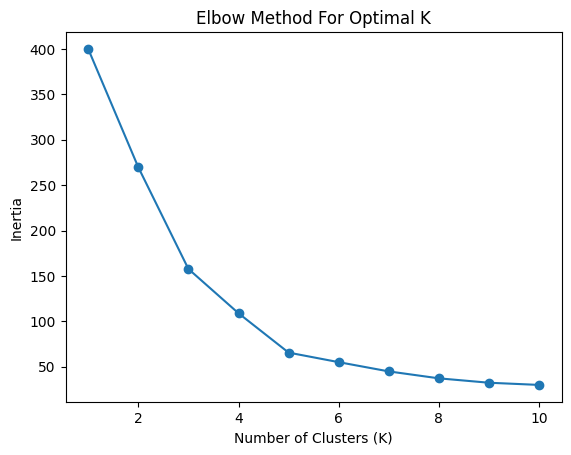

In [5]:

# Elbow Plot
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()


In [6]:

# Choosing K = 5
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(scaled_features)

# Add cluster labels
df["Cluster"] = clusters


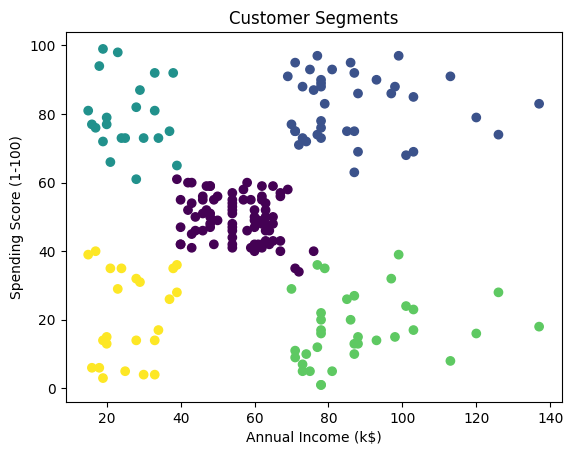

In [7]:

#  Cluster Visualization
plt.figure()
plt.scatter(features["Annual Income (k$)"], 
            features["Spending Score (1-100)"], 
            c=clusters)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()


In [8]:

output_path = r"S:\SUNNY PC\Elevate labs - 4 Months\Task - 12\Mall_Customers_Segmented.csv"
df.to_csv(output_path, index=False)

output_path


'S:\\SUNNY PC\\Elevate labs - 4 Months\\Task - 12\\Mall_Customers_Segmented.csv'